# The Sparks Foundation GRIP - JAN 2022
# Role - Data Science and Business Analytics Intern
# Author - Archita K
# Intermediate Level Task 4 - Exploratory Data Analysis - Terrorism

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
terrorism_data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

In [3]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Exploratory Data Analysis

In [4]:
terrorism_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
terrorism_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                               'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType',
                               'target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group',
                               'summary':'Summary','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType',
                               'motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'}, inplace=True)

In [6]:
terrorism_data = terrorism_data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType',
                                 'Killed','Wounded','Target','Summary','Group','TargetType','WeaponType','Motive']]

In [7]:
terrorism_data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,TargetType,WeaponType,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
terrorism_data.shape

(181691, 18)

In [9]:
terrorism_data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
terrorism_data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Summary        66129
Group              0
TargetType         0
WeaponType         0
Motive        131130
dtype: int64

In [11]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   AttackType  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  Target      181055 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  TargetType  181691 non-null  object 
 16  WeaponType  181691 non-null  object 
 17  Motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [12]:
terrorism_data.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


# Data Visualization

## Years with Most Terrorist Attacks

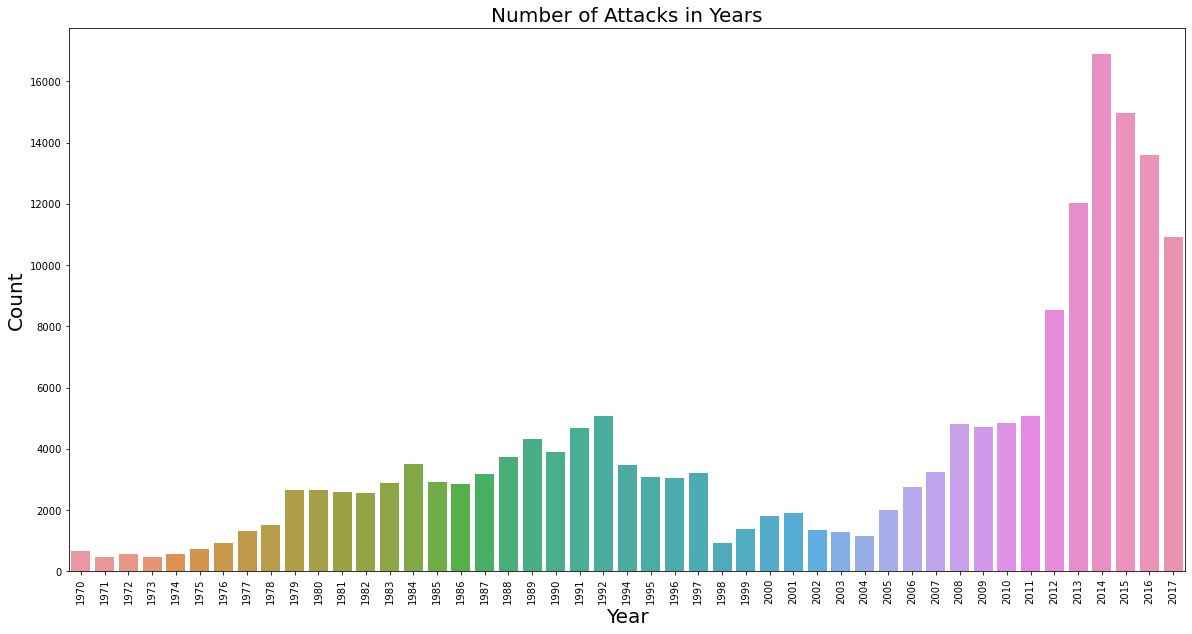

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(terrorism_data['Year'])
plt.title('Number of Attacks in Years',fontsize='20')
plt.xlabel('Year', fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.xticks(rotation='90')
plt.show()

### From the above plot, we can infere that the highest number of terrorist attacks occured in the year 2014

## Top 10 Affected Countries

In [14]:
terrorism_data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

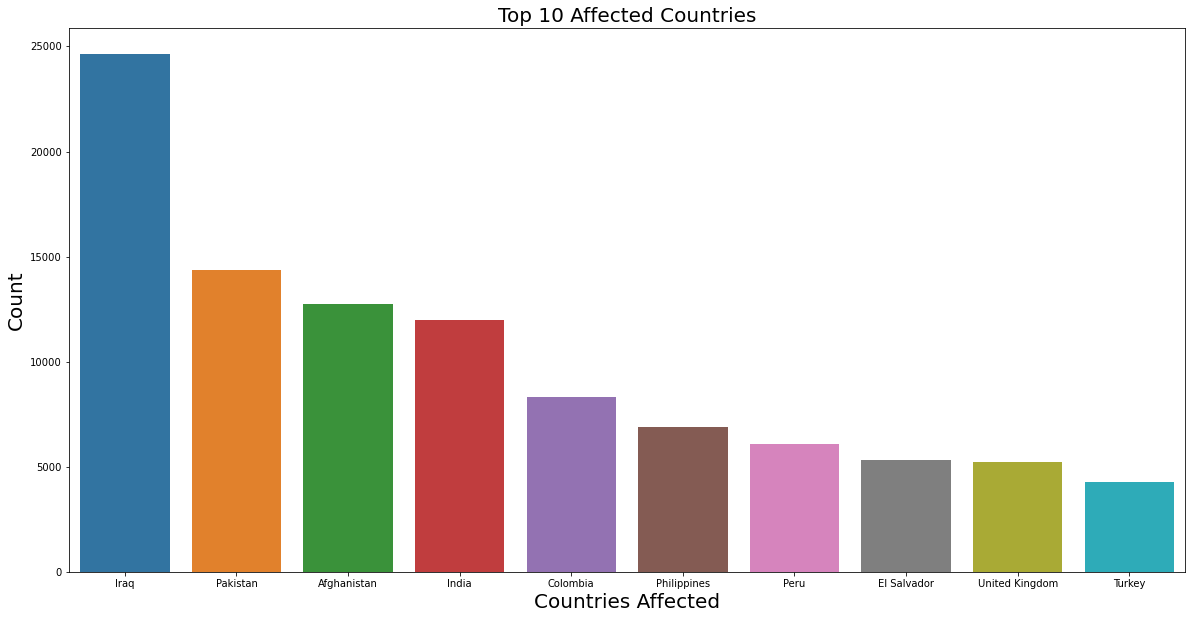

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['Country'].value_counts()[:10].index,terrorism_data['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected Countries',fontsize='20')
plt.xlabel('Countries Affected',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.show()

### From the above plot, we can infere that Iraq is the Most Affected Country

# Top 10 Affected Cities

In [16]:
terrorism_data['City'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

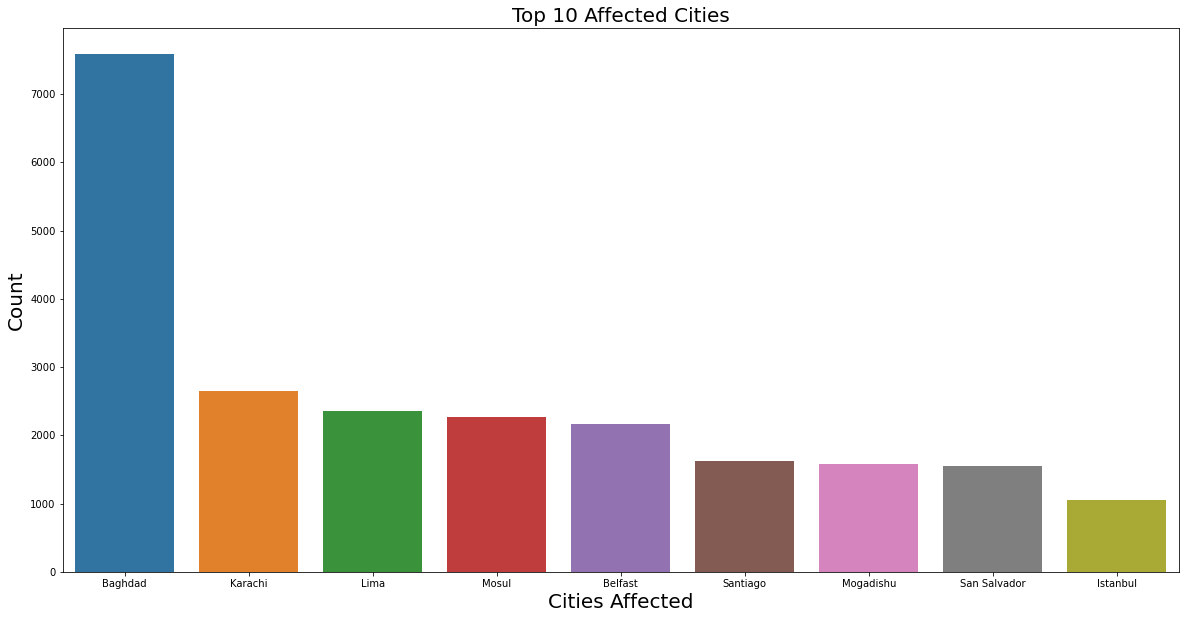

In [17]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['City'].value_counts()[1:10].index,terrorism_data['City'].value_counts()[1:10].values)
plt.title('Top 10 Affected Cities',fontsize='20')
plt.xlabel('Cities Affected',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.show()

### From the above plot, we can infere that Baghdad is the Most Affected City

# Top 10 Affected Region

In [18]:
terrorism_data['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

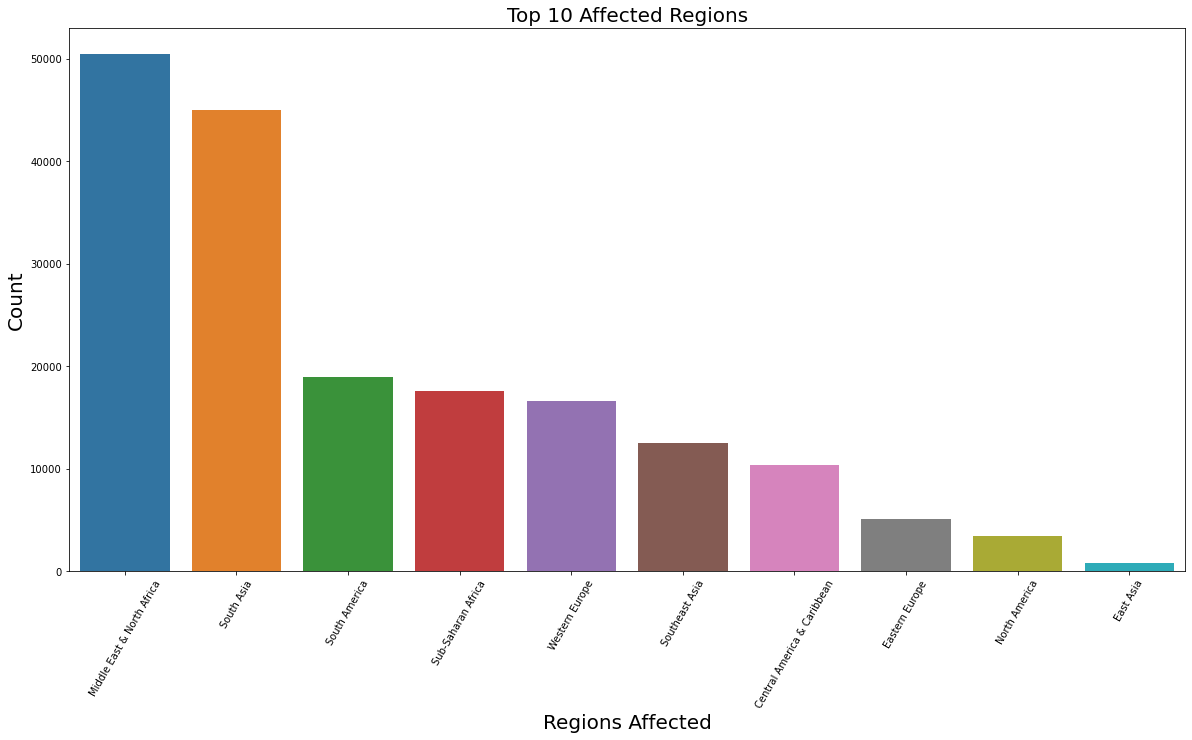

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['Region'].value_counts()[:10].index,terrorism_data['Region'].value_counts()[:10].values)
plt.title('Top 10 Affected Regions',fontsize='20')
plt.xlabel('Regions Affected',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that Middle East & North East Africa is the Most Affected Region

# Top 10 Affected States

In [20]:
terrorism_data['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

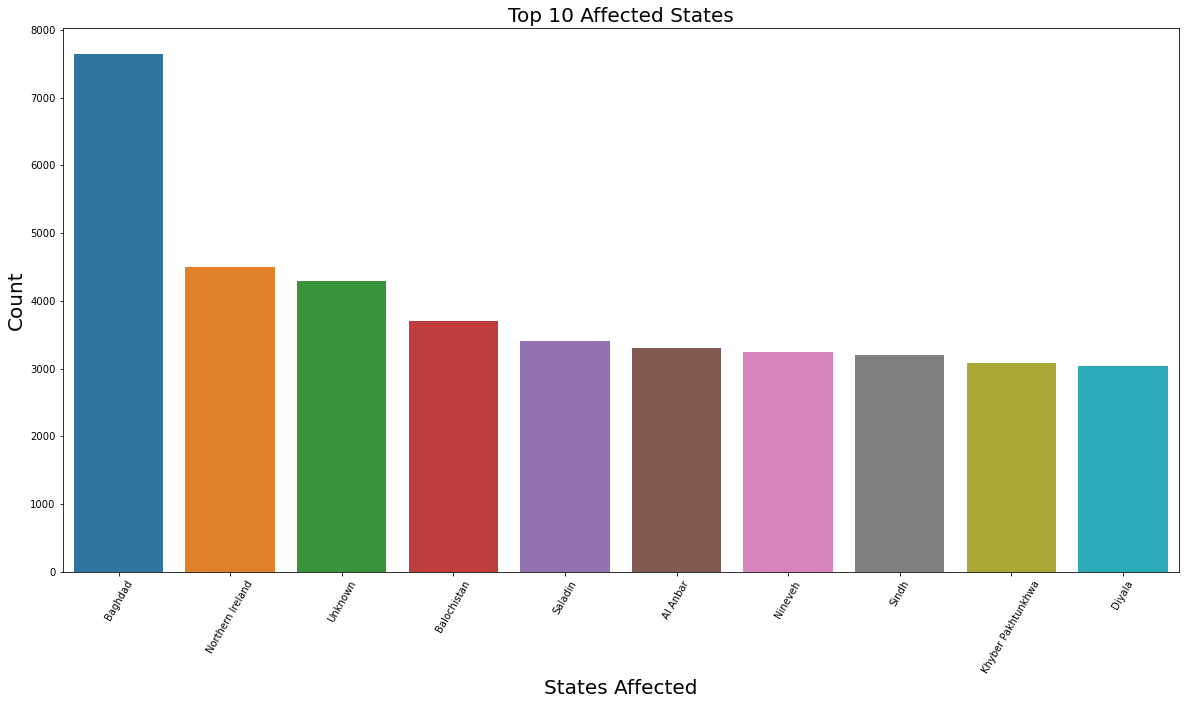

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['State'].value_counts()[:10].index,terrorism_data['State'].value_counts()[:10].values)
plt.title('Top 10 Affected States',fontsize='20')
plt.xlabel('States Affected',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that Baghdad is the Most Affected State

# Most Involved Terrorist Group

In [22]:
terrorism_data['Group'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

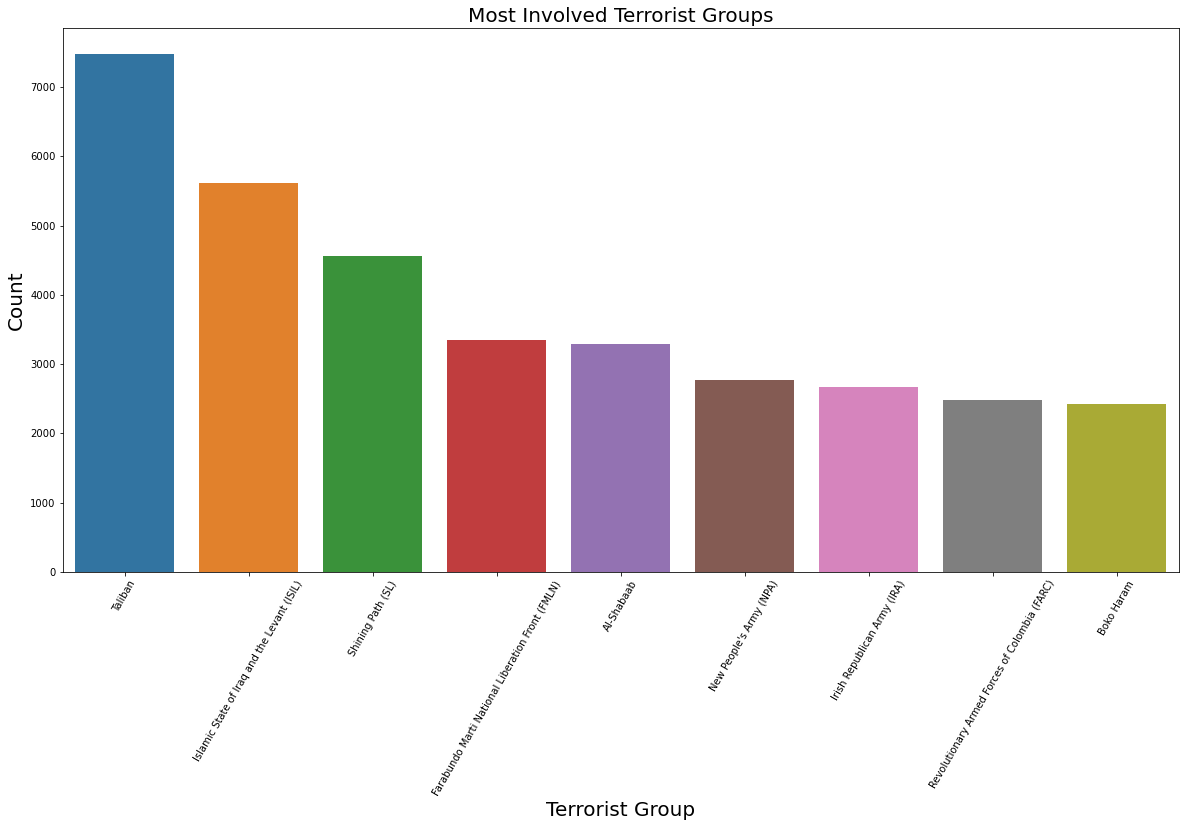

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(terrorism_data['Group'].value_counts()[1:10].index,terrorism_data['Group'].value_counts()[1:10].values)
plt.title('Most Involved Terrorist Groups',fontsize='20')
plt.xlabel('Terrorist Group',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that the highest involved terrorist group is Taliban

# Country Wise Killed

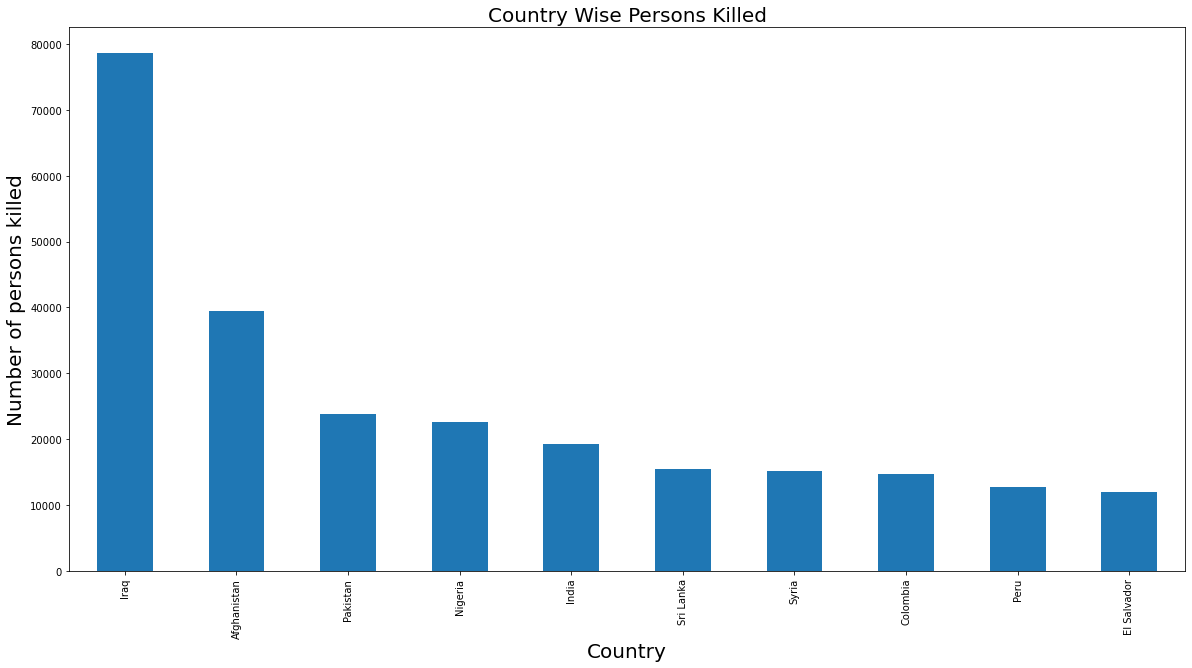

In [24]:
plt.figure(figsize=(20,10))
terrorism_data.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Country Wise Persons Killed', fontsize='20')
plt.xlabel('Country',fontsize='20')
plt.ylabel('Number of persons killed', fontsize='20')
plt.show()

# Region Wise Killed

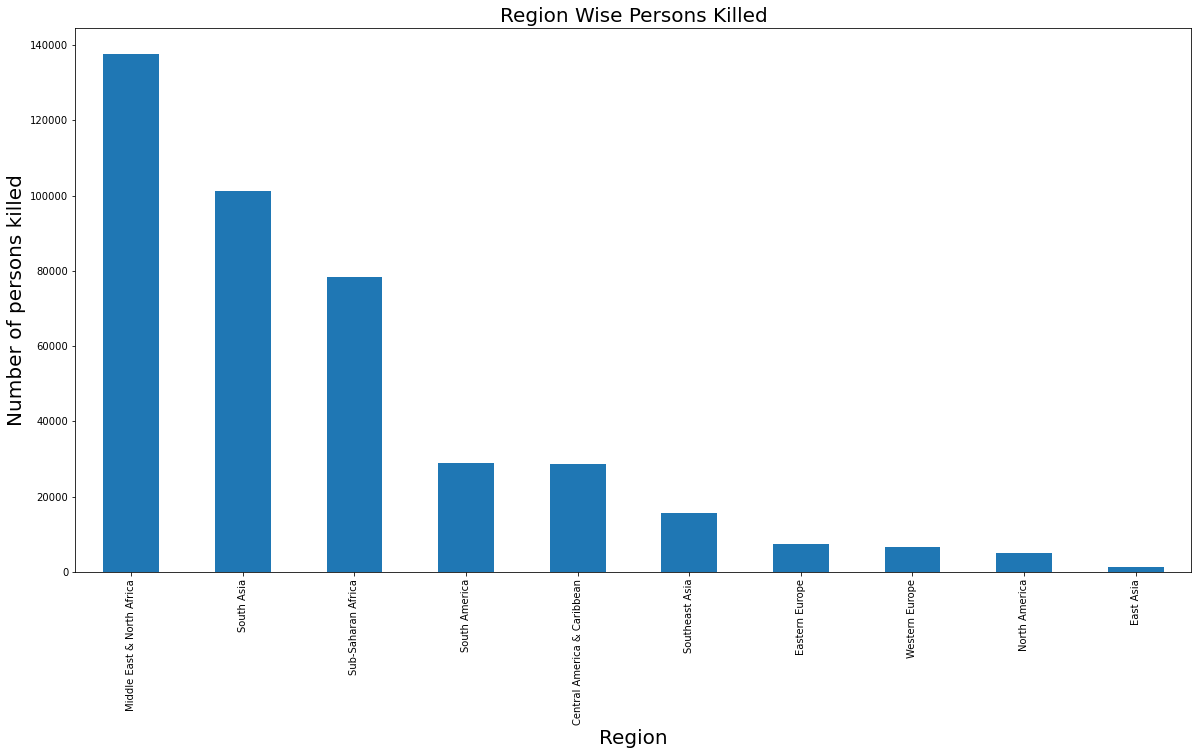

In [25]:
plt.figure(figsize=(20,10))
terrorism_data.groupby('Region')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Region Wise Persons Killed', fontsize='20')
plt.xlabel('Region',fontsize='20')
plt.ylabel('Number of persons killed', fontsize='20')
plt.show()

# City Wise Killed

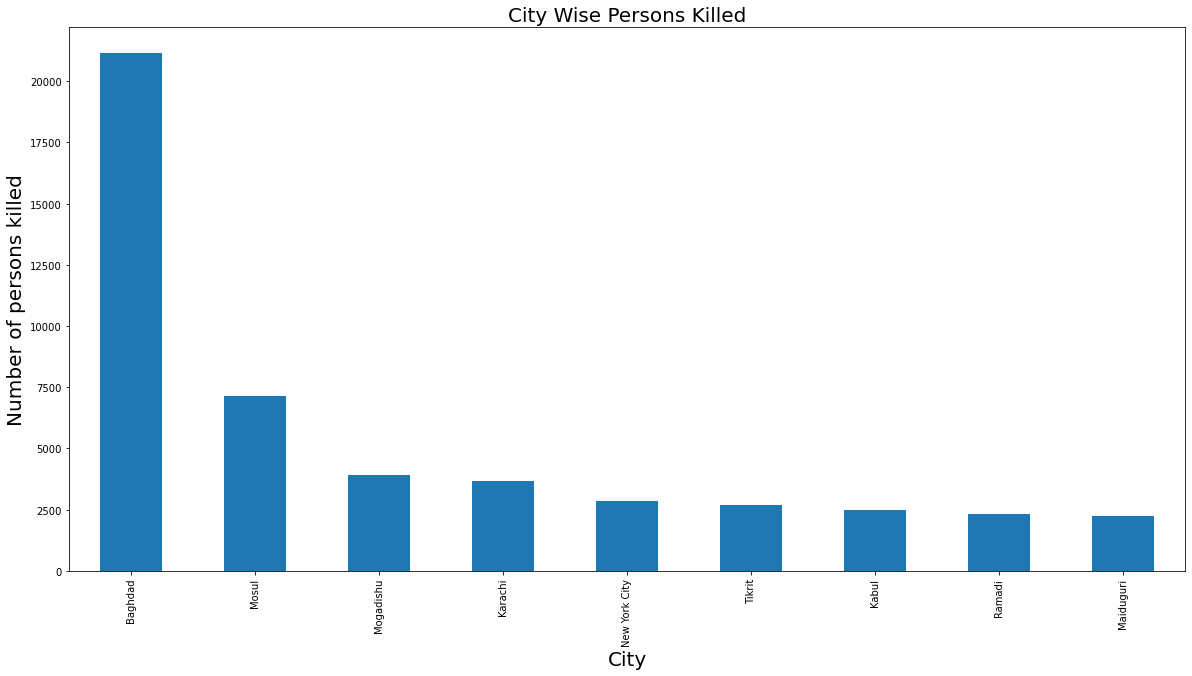

In [26]:
plt.figure(figsize=(20,10))
terrorism_data.groupby('City')['Killed'].sum().sort_values(ascending=False).head(10)[1:10].plot(kind='bar')
plt.title('City Wise Persons Killed', fontsize='20')
plt.xlabel('City',fontsize='20')
plt.ylabel('Number of persons killed', fontsize='20')
plt.show()

# State Wise Killed

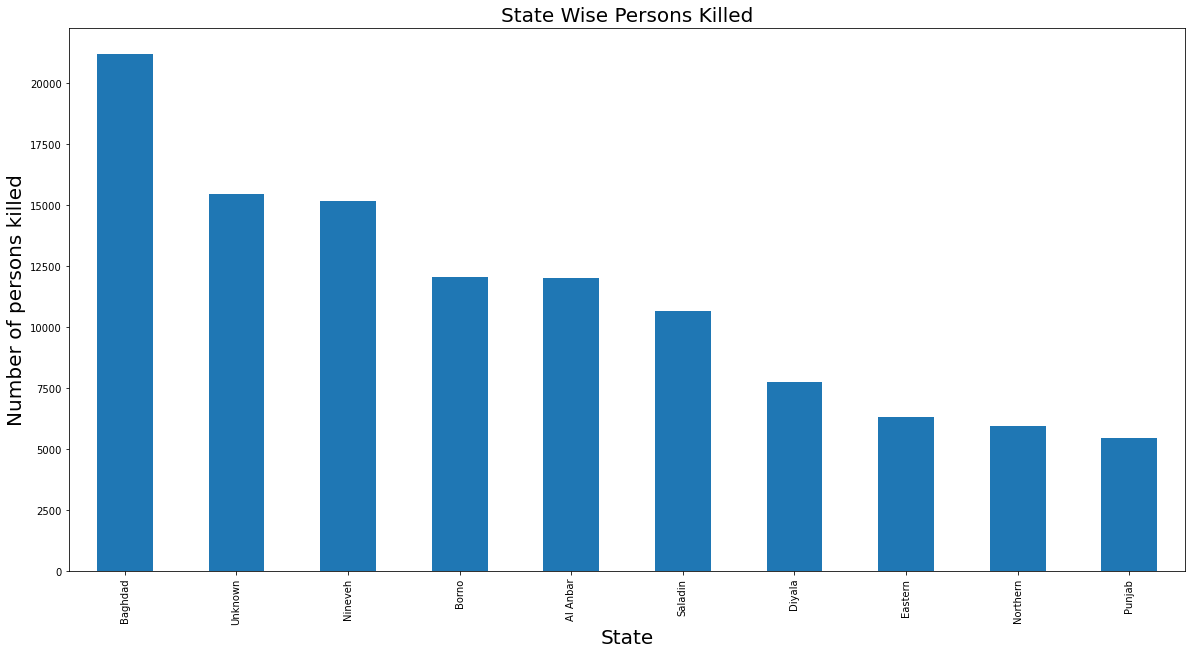

In [27]:
plt.figure(figsize=(20,10))
terrorism_data.groupby('State')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('State Wise Persons Killed', fontsize='20')
plt.xlabel('State',fontsize='20')
plt.ylabel('Number of persons killed', fontsize='20')
plt.show()

# Most Preferred Attack Type

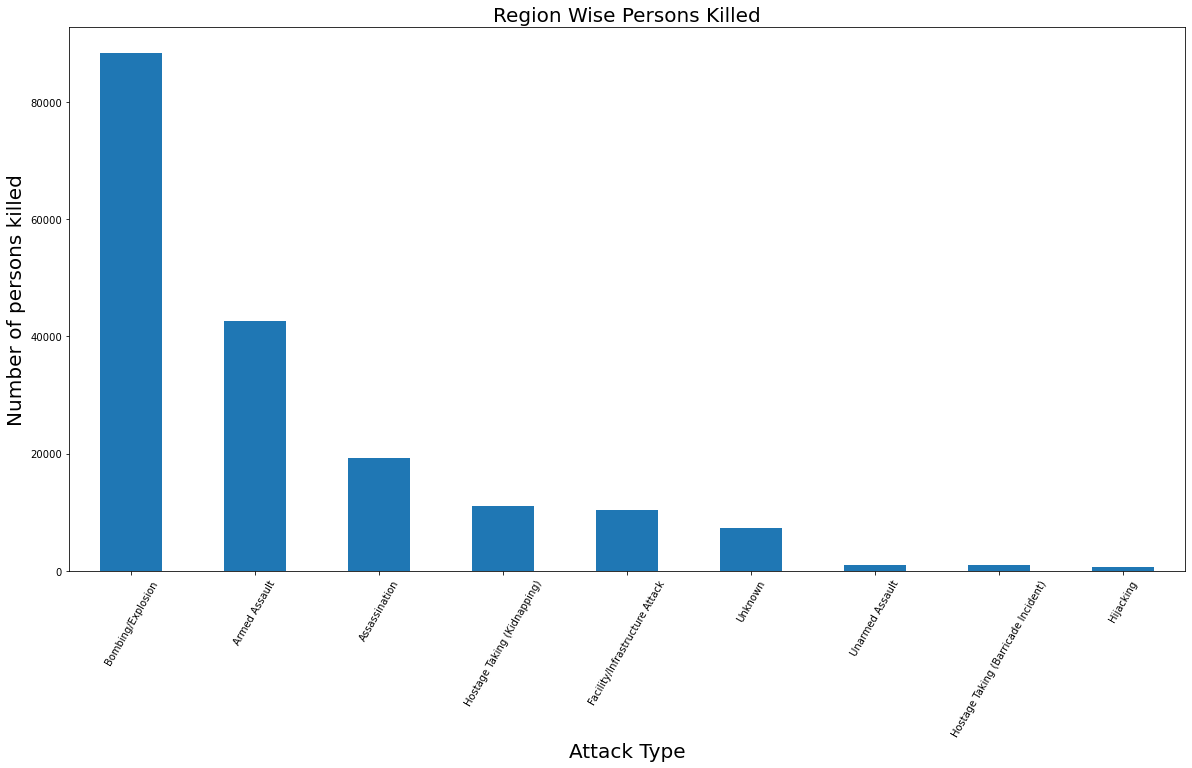

In [28]:
plt.figure(figsize=(20,10))
terrorism_data['AttackType'].value_counts().plot(kind='bar')
plt.title('Region Wise Persons Killed', fontsize='20')
plt.xlabel('Attack Type', fontsize='20')
plt.ylabel('Number of persons killed', fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that Bombing/Explosion is the most preferred type of attack

# Number of Peoples Killed from a Particular Attack Type

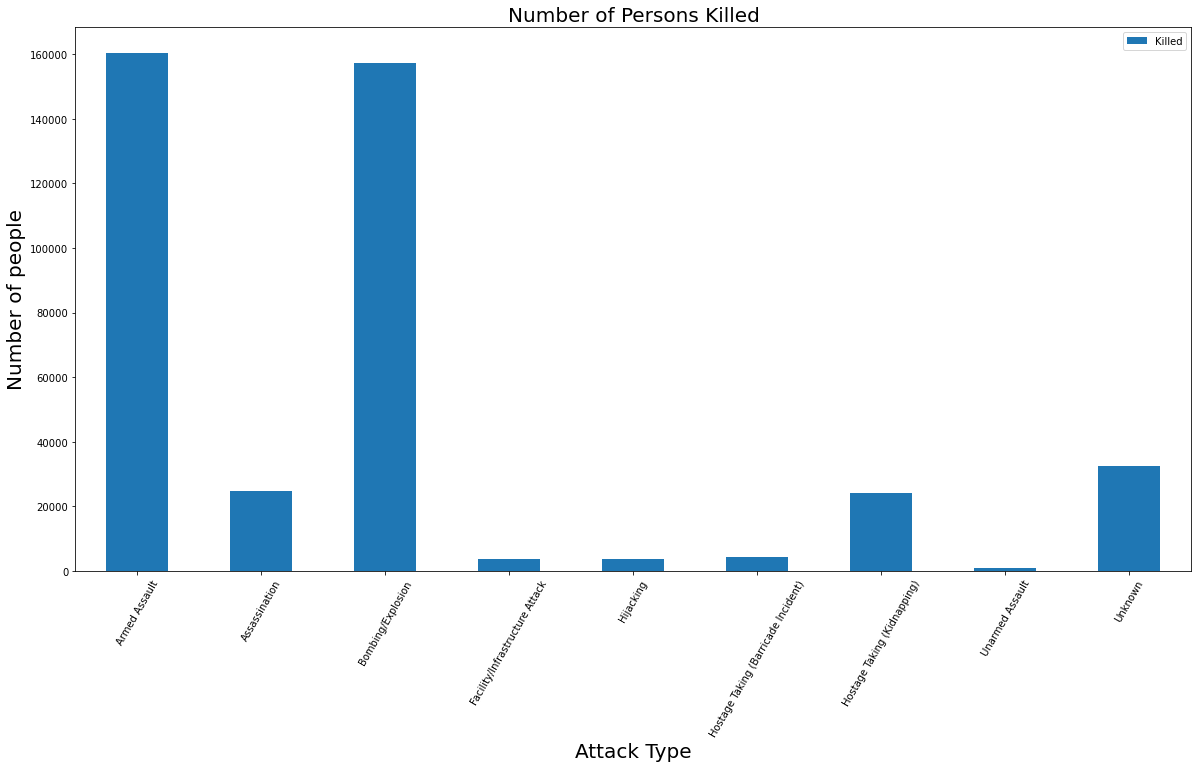

In [29]:
terrorism_data[['AttackType','Killed']].groupby(['AttackType']).sum().plot(kind='bar',figsize=(20,10))
plt.title('Number of Persons Killed', fontsize='20')
plt.xlabel('Attack Type', fontsize='20')
plt.ylabel('Number of people', fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that most number of people have been killed by Armed Assault

# Most Affected States of India

In [30]:
india = terrorism_data[terrorism_data['Country'] == 'India']['State']
india.value_counts()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Uttaranchal            24
Himachal Pradesh       24
Arunachal Pradesh      24
Telangana              24
Goa                     5
Sikkim                  4
Puducherry              2
Name: State, dtype: int64

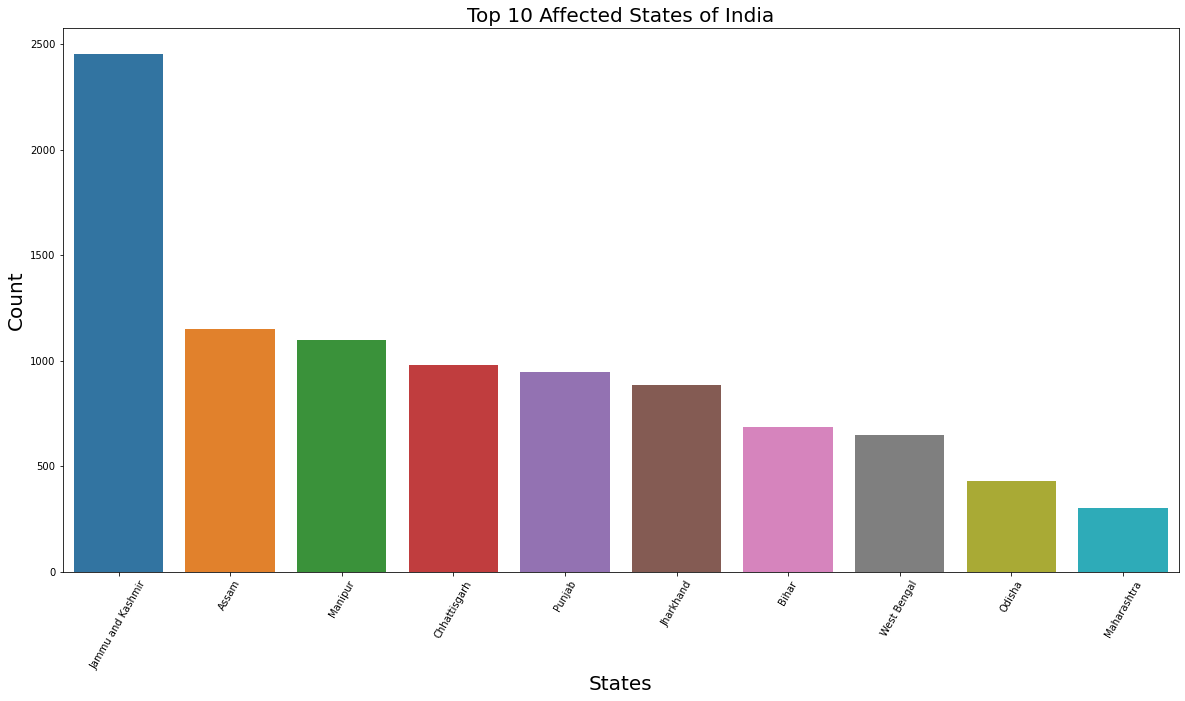

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(india.value_counts()[:10].index,india.value_counts()[:10].values)
plt.title('Top 10 Affected States of India',fontsize='20')
plt.xlabel('States',fontsize='20')
plt.ylabel('Count',fontsize='20')
plt.xticks(rotation='60')
plt.show()

### From the above plot, we can infere that Jammu and Kashmir is the most affected state of India

# Most Involved Terrorist Groups of India

In [32]:
india_1 = terrorism_data[terrorism_data['Country'] == 'India']['Group']
india_1.value_counts()[1:10]

Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
Hizbul Mujahideen (HM)                             199
Lashkar-e-Taiba (LeT)                              187
National Democratic Front of Bodoland (NDFB)       174
Garo National Liberation Army                      166
Muslim Separatists                                 118
Name: Group, dtype: int64

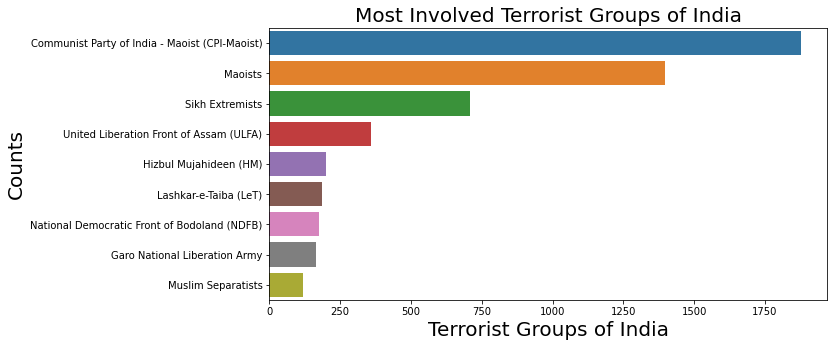

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(india_1.value_counts()[1:10].values,india_1.value_counts()[1:10].index)
plt.title('Most Involved Terrorist Groups of India', fontsize='20')
plt.xlabel('Terrorist Groups of India', fontsize='20')
plt.ylabel('Counts', fontsize='20')
plt.show()

### From the above plot, we can infere that Communist Party of India - Maoist(CPI-Maoist) is the most involved terrorist group of India

# Inference
### Most Affected Country - Iraq
### Most Affected City - Baghdad
### Most Affected Region - Middle East & North Africa
### Most Affected State - Baghdad
### Most Affected State of India - Jammu and Kashmir
### Most Preferred Attack Type - Bombing/Explosion
### Most Involved Terrorist Group - Taliban
### Most Involved Terrorist Group of India - Communist Party of India - Maoist(CPI-Maoist)